<a href="https://colab.research.google.com/github/nicolemd7/Rumour-Detection/blob/main/A_Comparative_Study_of_Machine_Learning_Approaches_for_Rumors_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Installation

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from PIL import Image
import spacy
nlp = spacy.load("en_core_web_sm")
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop =stopwords.words('english')
from wordcloud   import WordCloud, STOPWORDS
import string
import regex as re
string.punctuation
from sklearn import preprocessing
import pickle
from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
 from sklearn.ensemble import GradientBoostingClassifier

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Data Loading

The dataset that was extracted was then manually labelled

In [ ]:
dataframe =pd.read_csv("/content/drive/MyDrive/Rumour/dataset.csv")


In [ ]:
train=dataframe.sample(frac=0.8,random_state=200) #random state is a seed value
test=dataframe.drop(train.index)

#Dataset Loading

The **.head()** function prints the first 5 rows of the dataframe

In [ ]:
train.head()

,text,is_rumor,user.handle,topic
49295,NaN,NaN,NaN,NaN
76946,NaN,NaN,NaN,NaN
27925,NaN,NaN,NaN,NaN
95328,NaN,NaN,NaN,NaN
39574,NaN,NaN,NaN,NaN


,text,is_rumor,user.handle,topic
49295,NaN,NaN,NaN,NaN
76946,NaN,NaN,NaN,NaN
27925,NaN,NaN,NaN,NaN
95328,NaN,NaN,NaN,NaN
39574,NaN,NaN,NaN,NaN


In [ ]:
test.head()

,text,is_rumor,user.handle,topic
3,@H_E_Samuel @H_E_Samuel please call them terro...,1.0,pravsly,charliehebdo
4,@H_E_Samuel French govt needs to take strict a...,1.0,sharatsrs,charliehebdo
14,"@nanoSpawn Socialists, Antisemites, anti zioni...",1.0,J0nathanDavis,charliehebdo
17,"@euronews LOL. 5 million Muslims in France, wh...",1.0,NeoSkywalker13,charliehebdo
23,"@Channel4News 1 cleric for each victim, this w...",1.0,Factorialpython,charliehebdo


,text,is_rumor,user.handle,topic
3,@H_E_Samuel @H_E_Samuel please call them terro...,1.0,pravsly,charliehebdo
4,@H_E_Samuel French govt needs to take strict a...,1.0,sharatsrs,charliehebdo
14,"@nanoSpawn Socialists, Antisemites, anti zioni...",1.0,J0nathanDavis,charliehebdo
17,"@euronews LOL. 5 million Muslims in France, wh...",1.0,NeoSkywalker13,charliehebdo
23,"@Channel4News 1 cleric for each victim, this w...",1.0,Factorialpython,charliehebdo


In [ ]:
test.rename(columns = {'rumour_identification':'is_rumor','header':'topic'}, inplace = True)

#Exploratory Data Analysis

The **.shape** function gives the total number of rows and columns in the dataset

In [ ]:
train.shape

(82573, 4)

(82573, 4)

In [ ]:
test.shape

(20643, 4)

(20643, 4)

The **.head()** function prints the first 5 rows of the dataframe

In [ ]:
train.head()

,text,is_rumor,user.handle,topic
49295,NaN,NaN,NaN,NaN
76946,NaN,NaN,NaN,NaN
27925,NaN,NaN,NaN,NaN
95328,NaN,NaN,NaN,NaN
39574,NaN,NaN,NaN,NaN


,text,is_rumor,user.handle,topic
49295,NaN,NaN,NaN,NaN
76946,NaN,NaN,NaN,NaN
27925,NaN,NaN,NaN,NaN
95328,NaN,NaN,NaN,NaN
39574,NaN,NaN,NaN,NaN


In [ ]:
test.head()

,text,is_rumor,user.handle,topic
3,@H_E_Samuel @H_E_Samuel please call them terro...,1.0,pravsly,charliehebdo
4,@H_E_Samuel French govt needs to take strict a...,1.0,sharatsrs,charliehebdo
14,"@nanoSpawn Socialists, Antisemites, anti zioni...",1.0,J0nathanDavis,charliehebdo
17,"@euronews LOL. 5 million Muslims in France, wh...",1.0,NeoSkywalker13,charliehebdo
23,"@Channel4News 1 cleric for each victim, this w...",1.0,Factorialpython,charliehebdo


,text,is_rumor,user.handle,topic
3,@H_E_Samuel @H_E_Samuel please call them terro...,1.0,pravsly,charliehebdo
4,@H_E_Samuel French govt needs to take strict a...,1.0,sharatsrs,charliehebdo
14,"@nanoSpawn Socialists, Antisemites, anti zioni...",1.0,J0nathanDavis,charliehebdo
17,"@euronews LOL. 5 million Muslims in France, wh...",1.0,NeoSkywalker13,charliehebdo
23,"@Channel4News 1 cleric for each victim, this w...",1.0,Factorialpython,charliehebdo


The **.info()** function gives information about the datatype, number of non null rows and names of columns

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82573 entries, 49295 to 33705
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text         11954 non-null  object 
 1   is_rumor     11954 non-null  float64
 2   user.handle  11954 non-null  object 
 3   topic        11954 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.1+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 82573 entries, 49295 to 33705
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text         11954 non-null  object 
 1   is_rumor     11954 non-null  float64
 2   user.handle  11954 non-null  object 
 3   topic        11954 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.1+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20643 entries, 3 to 103212
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text         3040 non-null   object 
 1   is_rumor     3040 non-null   float64
 2   user.handle  3040 non-null   object 
 3   topic        3040 non-null   object 
dtypes: float64(1), object(3)
memory usage: 806.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20643 entries, 3 to 103212
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text         3040 non-null   object 
 1   is_rumor     3040 non-null   float64
 2   user.handle  3040 non-null   object 
 3   topic        3040 non-null   object 
dtypes: float64(1), object(3)
memory usage: 806.4+ KB


The **.describe()** function gives the total count of an element in the dataset, the mean number of likes and replies, the min and max values etc

In [ ]:
train.describe()

,is_rumor
count,11954.000000
mean,0.500000
std,0.500021
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


,is_rumor
count,11954.000000
mean,0.500000
std,0.500021
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [ ]:
test.describe()

,is_rumor
count,3040.000000
mean,0.500000
std,0.500082
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


,is_rumor
count,3040.000000
mean,0.500000
std,0.500082
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [ ]:
train.isna().sum()

text           70619
is_rumor       70619
user.handle    70619
topic          70619
dtype: int64

text           70619
is_rumor       70619
user.handle    70619
topic          70619
dtype: int64

In [ ]:
train= train.drop("topic",axis="columns")

In [ ]:
train= train.dropna()

In [ ]:
test.isna().sum()

text           17603
is_rumor       17603
user.handle    17603
topic          17603
dtype: int64

text           17603
is_rumor       17603
user.handle    17603
topic          17603
dtype: int64

In [ ]:
test= test.drop("topic",axis="columns")

In [ ]:
test= test.dropna()

#Data Cleaning

Adding Hashtags in a New Column


> Hashtags can be used to cluster data, it can also be used to gather more data on the company.To access the hashtags mentioned in these comments we append all strings starting with **#** into the column,to do this we use regex



In [ ]:
train["Hashtags"]= train["text"].apply(lambda x: re.findall(r"#(\w+)", x))

In [ ]:
test["Hashtags"]= test["text"].apply(lambda x: re.findall(r"#(\w+)", x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train.head()

,text,is_rumor,user.handle,Hashtags
4266,@kayoazul @_westwest_yall #WE Are #TARGETS I H...,0.0,Progress4Ohio,"[WE, TARGETS, Cleveland, 13RacistCops, MURDERE..."
6831,@mashable @republikein_na,0.0,GaroesMonica,[]
7573,“@airlivenet: #A320 crashed could be Germanwin...,1.0,Rangith,"[A320, 4U9525]"
11156,"“@CP24: UPDATED: Shots fired -Parliament Hill,...",1.0,Bowman3Bowman,[]
11392,@Ahmed__Hussain_ @ummsalama15_ Some media owne...,1.0,rcallimachi,[]


,text,is_rumor,user.handle,Hashtags
4266,@kayoazul @_westwest_yall #WE Are #TARGETS I H...,0.0,Progress4Ohio,"[WE, TARGETS, Cleveland, 13RacistCops, MURDERE..."
6831,@mashable @republikein_na,0.0,GaroesMonica,[]
7573,“@airlivenet: #A320 crashed could be Germanwin...,1.0,Rangith,"[A320, 4U9525]"
11156,"“@CP24: UPDATED: Shots fired -Parliament Hill,...",1.0,Bowman3Bowman,[]
11392,@Ahmed__Hussain_ @ummsalama15_ Some media owne...,1.0,rcallimachi,[]



We now remove the urls and punctuation from the comments


> **URL** : For url we make get rid of all strings that start with http,https or www.


> **Punctuation** : We make use of the string package and access all possible punctuations,using the function we have defined we remove all punctuations and append the text and add it into the datafram





In [ ]:
train["URL removed"] =train["text"].apply(lambda x: re.split('((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)', str(x))[0])

In [ ]:
test["URL removed"] =test["text"].apply(lambda x: re.split('((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)', str(x))[0])



> **Remove HTML Tags** Since the data is extracted in HTML format,it may contain data enclosed in HTML tags, space brackets etc, we get rid of these tags



In [ ]:
def tag_remove(text):
  return re.sub('<[^<]+?>','', text)


In [ ]:
train["Tags Removed"] = train["URL removed"].apply(lambda x:tag_remove(x))

In [ ]:
test["Tags Removed"] = test["URL removed"].apply(lambda x:tag_remove(x))

The function remove punctuation takes in comment as a parameter and for each comment removes the punctuation and appends the regular words to a string, this string along with all other comment strings are returned as a list and then declared as a new column

In [ ]:

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
train["Punctuation removed"] =train["Tags Removed"].apply(lambda x:remove_punctuation(x))


test["Punctuation removed"] =test["Tags Removed"].apply(lambda x:remove_punctuation(x))


> **Removing Numbers** : Using the .isdigit() function we identify which of the words in the text contain numeric values, we skip the numeric values and concatenate the rest of text




In [ ]:
def remove_num(text):
  return ''.join(c for c in text if not c.isdigit())

In [ ]:
train["Numbers removed"] =train["Punctuation removed"].apply(lambda x:remove_num(x))


In [ ]:
test["Numbers removed"] =test["Punctuation removed"].apply(lambda x:remove_num(x))


Converting Text to Lowercase form

> We convert the text to lowercase using the **.lower()** function,we iterate it through every word in the text




In [ ]:
def to_lower(text):
    return ''.join([w.lower() for w in text])

In [ ]:
train["Lowercase"] =train["Numbers removed"].apply(lambda x:to_lower(x))


In [ ]:
test["Lowercase"] =test["Numbers removed"].apply(lambda x:to_lower(x))


#Data Visualization

Inorder to visualize the distribution of the 2 categories of comments  we will use countplot, the countplot will also help us understand if there's any imbalance in the data

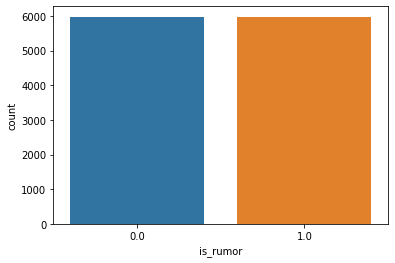

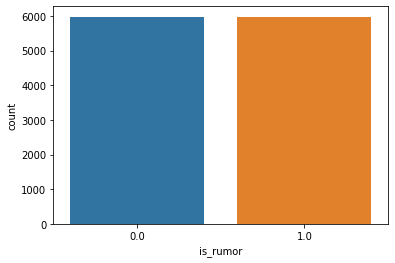

In [ ]:
sns.countplot(data=train, x = train["is_rumor"])

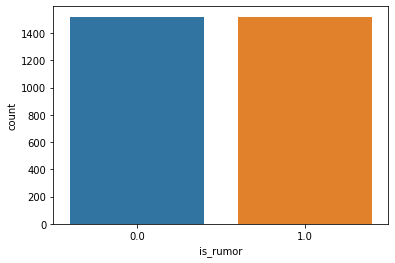

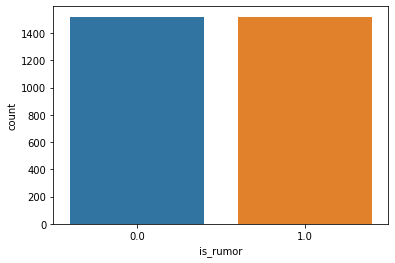

In [ ]:
sns.countplot(data=test, x = test["is_rumor"])

In [ ]:
train["is_rumor"].unique()

array([0., 1.])

array([0., 1.])

In [ ]:
test["is_rumor"].unique()

array([1., 0.])

array([1., 0.])



> **Word Cloud** : Used to identify the most commonly used words in comments



Using the wordcloud function for each comment in the lowercase column we define the 





In [ ]:
mask = np.array(Image.open('/content/drive/MyDrive/Rumour/twitter.png'))

In [ ]:
def one_color_func(word=None, font_size=None, 
                   position=None, orientation=None, 
                   font_path=None, random_state=None):
    h = 0 # 0 - 360
    s = 172 # 0 - 10
    l = 238 # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)

In [ ]:
def cutecloud(data, is_rumor):
  combined_tweets = " ".join([tweet for tweet in data[data.is_rumor==is_rumor]['Lowercase']])
  wc = WordCloud(stopwords=STOPWORDS,mask=mask,color_func=one_color_func, background_color="black",max_words=2000, max_font_size=256,random_state=42, width=mask.shape[1],height=mask.shape[0])
  wc.generate(combined_tweets)
  plt.imshow(wc, interpolation="bilinear")
  plt.axis('off')
  plt.show()
  
  

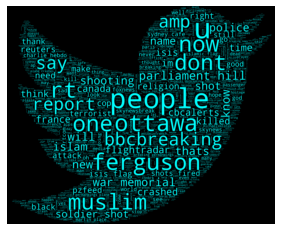

In [ ]:
cutecloud(train,1)

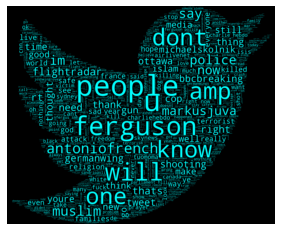

In [ ]:
cutecloud(train,0)



> **Distribution of number of words in text** 
Using the KDE plot function of the seaborn package we plot a normal distribution of the number of words used in each text,from the below plot we can infer that most comments contain between 0 to 200 words




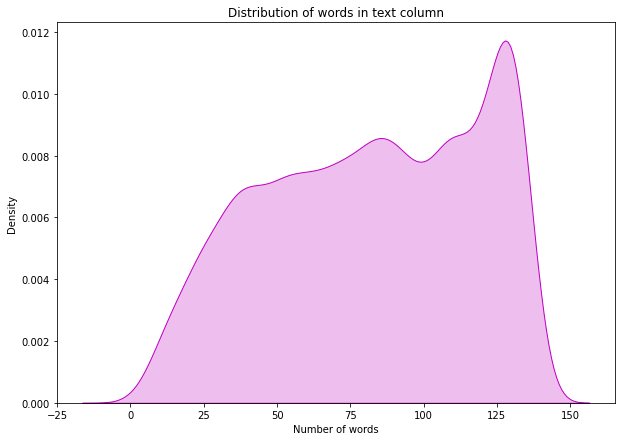

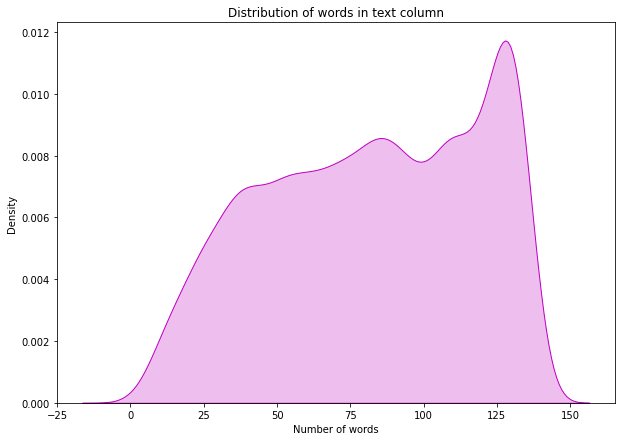

In [ ]:
train["num of words"] = train["Lowercase"].apply(lambda x: len(x))
plt.figure(figsize=(10,7))
sns.kdeplot(train["num of words"],shade=True, color='m')
plt.title("Distribution of words in text column")
plt.xlabel("Number of words")
plt.show()

Likes Vs Number of Words In a Comment

#Data Preprocessing

Stop Word Removal

Stop Words in NLP are simply words that do not contribute to the sentiment analysis of text e.g words like the,a etc


> To eliminate stopwords from the below text we make use of the NLTK stopword list, and we make use of a count vectorizer and TFiDF vectorizer to count the number of occurences of a word and evaluate whether it's a stopword or not



In [ ]:


#using the count vectorizer
count = CountVectorizer()
word_count=count.fit_transform(train['Lowercase'].values.astype('U'))

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count)
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=count.get_feature_names(),columns=["idf_weights"])


#inverse document frequency
df_idf.sort_values(by=['idf_weights'])

#tfidf
tf_idf_vector=tfidf_transformer.transform(word_count)
feature_names = count.get_feature_names()

first_document_vector=tf_idf_vector[1]
df_tfifd= pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])

df_tfifd.sort_values(by=["tfidf"],ascending=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,tfidf
aaenmss,0.000000
precise,0.000000
precisely,0.000000
precision,0.000000
predicament,0.000000
...,...
gaze,0.000000
gathered,0.000000
허걱스,0.000000
mashable,0.568497


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,tfidf
aaenmss,0.000000
precise,0.000000
precisely,0.000000
precision,0.000000
predicament,0.000000
...,...
gaze,0.000000
gathered,0.000000
허걱스,0.000000
mashable,0.568497


In [ ]:
train['Stopwords_Removed'] = train['Lowercase'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
test['Stopwords_Removed'] = test['Lowercase'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

Lemmatization 

Process of grouping together different terms of the same word.


> the reason for choosing lemmatization over stemming was that regardless of how the word is chopped off in lemmatization the lemma will always be
an actual word,which is not the case with stemming, this has proven to improve accuracy


> For lemmatization we have made use of the spacy library as it much more faster and accurate than it's counter parts NLTK and TextBlob



In [ ]:
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python -m spacy download en_core_web_sm

2022-09-22 04:56:02.899251: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 4.2 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
2022-09-22 05:04:16.693181: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 4.1 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:

def lemmatization(text):
  empty_list = []
  for t in text:
    newstring =""
    doc = nlp(t)
    for token in doc:
      if len(token)>1:
        token= token.lemma_
        newstring+= (token+" ")
    empty_list.append(newstring)
  return empty_list


In [ ]:
train["Lemmatization"]= lemmatization(train["Stopwords_Removed"])

In [ ]:
test["Lemmatization"]= lemmatization(test["Stopwords_Removed"])

Tokenization

The process of breaking a stream of textual data into words, terms, sentences, symbols, or some other meaningful elements called tokens.


> Tweet Tokenizer were designed especially for social media data which makes them better equipped to tokenize words in this format



In [ ]:

token = TweetTokenizer()
def tokenisation(text):
    return token.tokenize(text)


In [ ]:
train["Tokenized"]= train["Lemmatization"].apply(lambda x:tokenisation(x))

In [ ]:
test["Tokenized"]= test["Lemmatization"].apply(lambda x:tokenisation(x))

#Train - Test Split

Splitting data into train and test set

In [ ]:
X_train = train["Lemmatization"]
y_train = train["is_rumor"]

In [ ]:
X_test2 = test["Lemmatization"]
y_test2 = test["is_rumor"]

Word Vectorization


The model used for word vectorization is TF-iDF

In [ ]:
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

# Fitting TF-IDF to both training and test sets (semi-supervised learning)
tfv.fit(list(X_train) + list(X_test2))
X_train =  tfv.transform(X_train) 
X_test2 = tfv.transform(X_test2)

#Machine Learning Algorithm

**SVC**


> Support Vector Classifier is a supervised machine learning method that is often employed for classification tasks. The SVC algorithm works by mapping data points to a high-dimensional space and then separates the data into two according to the the most optimal hyperplane for dividing the data.



In [ ]:
model = SVC()
svm = model.fit(X_train , y_train)

In [ ]:
final=svm.predict(X_test2)

In [ ]:
cf_matrix=confusion_matrix(y_test2,final)

In [ ]:
classes =["Not Rumour","Rumour"]

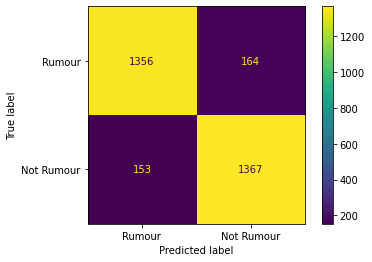

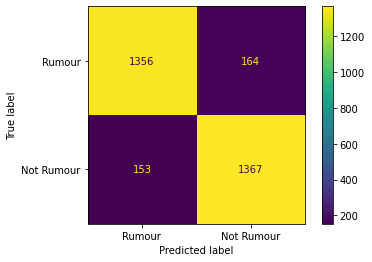

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,display_labels=classes)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test2,final))

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90      1520
         1.0       0.89      0.90      0.90      1520

    accuracy                           0.90      3040
   macro avg       0.90      0.90      0.90      3040
weighted avg       0.90      0.90      0.90      3040

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90      1520
         1.0       0.89      0.90      0.90      1520

    accuracy                           0.90      3040
   macro avg       0.90      0.90      0.90      3040
weighted avg       0.90      0.90      0.90      3040



Random Forest 


> Random forest is used for executing common Classification as well as Regression supervised machine learning technique. It utilizes the majority vote during classification and the mean in regression from the several samples obtained from constructing decision trees. Random Forest can handle continuous as well as categorical variables i.e., classification and regression. 


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(random_state=1).fit(X_train, y_train)


In [ ]:
final=rfc.predict(X_test2)

In [ ]:
cf_matrix=confusion_matrix(y_test2,final)

In [ ]:
classes =["Not Rumour","Rumour"]

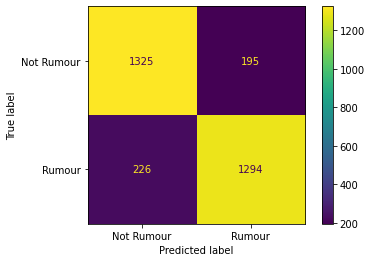

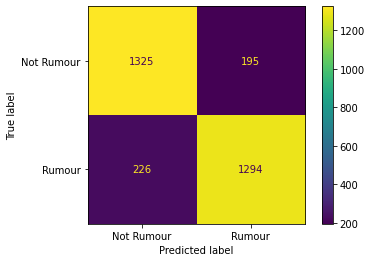

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,display_labels=classes)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test2,final))

              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      1520
         1.0       0.87      0.85      0.86      1520

    accuracy                           0.86      3040
   macro avg       0.86      0.86      0.86      3040
weighted avg       0.86      0.86      0.86      3040

              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      1520
         1.0       0.87      0.85      0.86      1520

    accuracy                           0.86      3040
   macro avg       0.86      0.86      0.86      3040
weighted avg       0.86      0.86      0.86      3040



Decision Tree


> Decision Tree that can be applied to both classification and regression issues, it is most commonly employed to solve problems of classification. It has a tree-like structure, with the internal nodes denoting the properties of a dataset, the decision rules are represented by the branches, and the leaf nodes indicating the conclusion. 



In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dtree= DecisionTreeClassifier(random_state=1).fit(X_train, y_train)


In [ ]:
final=dtree.predict(X_test2)

In [ ]:
cf_matrix=confusion_matrix(y_test2,final)

In [ ]:
classes =["Not Rumour","Rumour"]

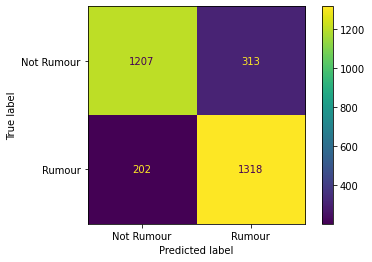

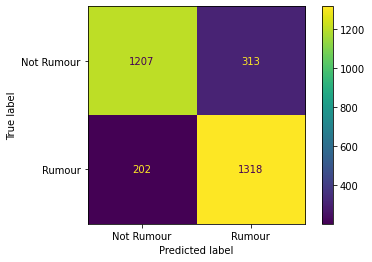

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,display_labels=classes)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test2,final))

              precision    recall  f1-score   support

         0.0       0.86      0.79      0.82      1520
         1.0       0.81      0.87      0.84      1520

    accuracy                           0.83      3040
   macro avg       0.83      0.83      0.83      3040
weighted avg       0.83      0.83      0.83      3040

              precision    recall  f1-score   support

         0.0       0.86      0.79      0.82      1520
         1.0       0.81      0.87      0.84      1520

    accuracy                           0.83      3040
   macro avg       0.83      0.83      0.83      3040
weighted avg       0.83      0.83      0.83      3040



AdaBoost


> The efficiency of binary classifiers was the primary motivation behind the development of the AdaBoost ensemble learning approach, which was first developed to improve learning in general. AdaBoost is an iterative method for making weak classifiers work better by learning from their flaws and then changing them into stronger ones.



In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
svm = AdaBoostClassifier(base_estimator=dtree,random_state=1).fit(X_train, y_train)


In [ ]:
final=svm.predict(X_test2)

In [ ]:
cf_matrix=confusion_matrix(y_test2,final)

In [ ]:
classes =["Not Rumour"," Rumour"]

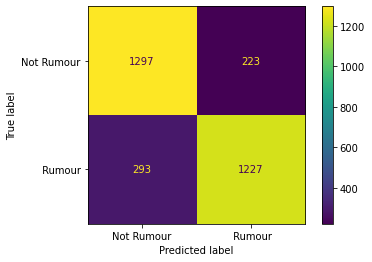

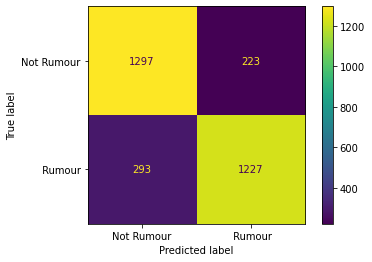

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,display_labels=classes)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test2,final))

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83      1520
         1.0       0.85      0.81      0.83      1520

    accuracy                           0.83      3040
   macro avg       0.83      0.83      0.83      3040
weighted avg       0.83      0.83      0.83      3040

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83      1520
         1.0       0.85      0.81      0.83      1520

    accuracy                           0.83      3040
   macro avg       0.83      0.83      0.83      3040
weighted avg       0.83      0.83      0.83      3040



MNB


> Multinomial Naive Bayes is learning technique in Natural Language Processing (NLP) based on Bayes theorem. Using the Bayes theorem, the program forecasts the tag of a text, like an email or a news article. It analyses the chance of each tag being associated with the supplied sample and returns the tag that is associated with the highest probability. 



In [ ]:
mnb =MultinomialNB().fit(X_train,y_train)

In [ ]:
final=mnb.predict(X_test2)

In [ ]:
cf_matrix=confusion_matrix(y_test2,final)

In [ ]:
classes =["Not Rumour","Rumour"]

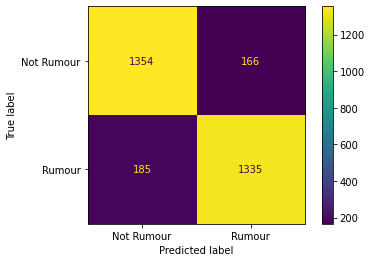

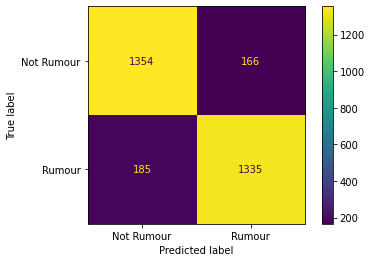

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,display_labels=classes)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test2,final))

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89      1520
         1.0       0.89      0.88      0.88      1520

    accuracy                           0.88      3040
   macro avg       0.88      0.88      0.88      3040
weighted avg       0.88      0.88      0.88      3040

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89      1520
         1.0       0.89      0.88      0.88      1520

    accuracy                           0.88      3040
   macro avg       0.88      0.88      0.88      3040
weighted avg       0.88      0.88      0.88      3040



MLP


> MLP also known as Multi-Layer Perceptron. It is made up of many layers that are tightly connected and can change every other input dimension into the needed dimension. A perception with multiple layers is a neural network with numerous layers. To make a neural network, neurons are combined so that the outputs of some neurons feed into the inputs of other neurons.



In [ ]:
mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

In [ ]:
final=mlp.predict(X_test2)

In [ ]:
cf_matrix=confusion_matrix(y_test2,final)

In [ ]:
classes =["Not Rumour","Rumour"]

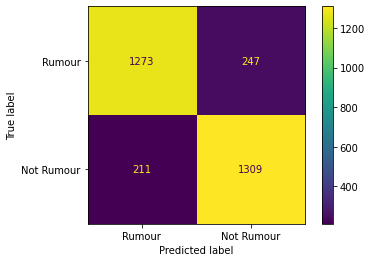

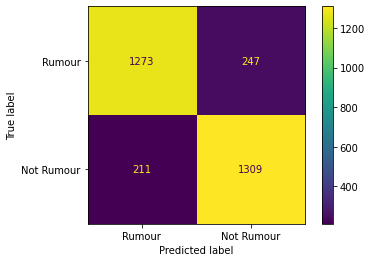

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,display_labels=classes)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test2,final))

              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      1520
         1.0       0.84      0.86      0.85      1520

    accuracy                           0.85      3040
   macro avg       0.85      0.85      0.85      3040
weighted avg       0.85      0.85      0.85      3040

              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      1520
         1.0       0.84      0.86      0.85      1520

    accuracy                           0.85      3040
   macro avg       0.85      0.85      0.85      3040
weighted avg       0.85      0.85      0.85      3040



KNN


> K-Nearest Neighbor is an algorithm for Supervised Learning. The K-NN algorithm assumes that there is a similarity between the new case or data and the previous cases, and it places the new case in the most pertinent category. K-NN can be utilised for both Regression and Classification but is primarily utilised for Classification.



In [ ]:
knn = KNeighborsClassifier().fit(X_train,y_train)

In [ ]:
final = knn.predict(X_test2)

In [ ]:
cf_matrix=confusion_matrix(y_test2,final)

In [ ]:
classes =["Not Rumour","Rumour"]

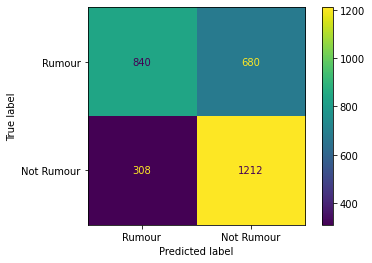

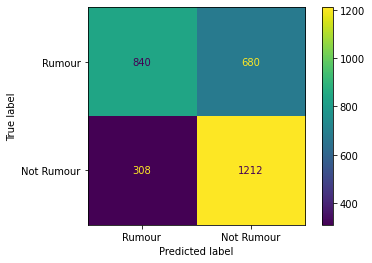

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,display_labels=classes)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test2,final))

              precision    recall  f1-score   support

         0.0       0.73      0.55      0.63      1520
         1.0       0.64      0.80      0.71      1520

    accuracy                           0.68      3040
   macro avg       0.69      0.68      0.67      3040
weighted avg       0.69      0.68      0.67      3040

              precision    recall  f1-score   support

         0.0       0.73      0.55      0.63      1520
         1.0       0.64      0.80      0.71      1520

    accuracy                           0.68      3040
   macro avg       0.69      0.68      0.67      3040
weighted avg       0.69      0.68      0.67      3040



Logistic Regression


> One of the most common Machine Learning algorithms is used in this Supervised Learning method. It is utilised to make forecasts about the categorical dependent variable by basing such forecasts on a collection of independent components. It is able to make predictions about the results of categorical dependent variables.



In [ ]:
clf = LogisticRegression().fit(X_train, y_train)

In [ ]:
final = clf.predict(X_test2)

In [ ]:
cf_matrix=confusion_matrix(y_test2,final)

In [ ]:
classes =["Not Rumour","Rumour"]

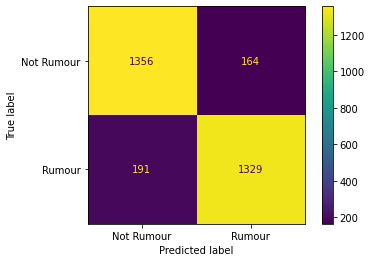

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,display_labels=classes)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test2,final))

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88      1520
         1.0       0.89      0.87      0.88      1520

    accuracy                           0.88      3040
   macro avg       0.88      0.88      0.88      3040
weighted avg       0.88      0.88      0.88      3040



In [ ]:
train.head()

,text,is_rumor,user.handle,Hashtags,URL removed,Tags Removed,Punctuation removed,Numbers removed,Lowercase,num of words,Stopwords_Removed,Lemmatization,Tokenized
4266,@kayoazul @_westwest_yall #WE Are #TARGETS I H...,0.0,Progress4Ohio,"[WE, TARGETS, Cleveland, 13RacistCops, MURDERE...",@kayoazul @_westwest_yall #WE Are #TARGETS I H...,@kayoazul @_westwest_yall #WE Are #TARGETS I H...,kayoazul westwestyall WE Are TARGETS I Have Ve...,kayoazul westwestyall WE Are TARGETS I Have Ve...,kayoazul westwestyall we are targets i have ve...,111,kayoazul westwestyall targets vented since cle...,kayoazul westwestyall target vent since clevel...,"[kayoazul, westwestyall, target, vent, since, ..."
6831,@mashable @republikein_na,0.0,GaroesMonica,[],@mashable @republikein_na,@mashable @republikein_na,mashable republikeinna,mashable republikeinna,mashable republikeinna,22,mashable republikeinna,mashable republikeinna,"[mashable, republikeinna]"
7573,“@airlivenet: #A320 crashed could be Germanwin...,1.0,Rangith,"[A320, 4U9525]",“@airlivenet: #A320 crashed could be Germanwin...,“@airlivenet: #A320 crashed could be Germanwin...,“airlivenet A320 crashed could be Germanwings ...,“airlivenet A crashed could be Germanwings fli...,“airlivenet a crashed could be germanwings fli...,81,“airlivenet crashed could germanwings flight u...,airlivenet crash could germanwing flight barce...,"[airlivenet, crash, could, germanwing, flight,..."
11156,"“@CP24: UPDATED: Shots fired -Parliament Hill,...",1.0,Bowman3Bowman,[],"“@CP24: UPDATED: Shots fired -Parliament Hill,...","“@CP24: UPDATED: Shots fired -Parliament Hill,...",“CP24 UPDATED Shots fired Parliament Hill sold...,“CP UPDATED Shots fired Parliament Hill soldie...,“cp updated shots fired parliament hill soldie...,81,“cp updated shots fired parliament hill soldie...,cp update shot fire parliament hill soldier in...,"[cp, update, shot, fire, parliament, hill, sol..."
11392,@Ahmed__Hussain_ @ummsalama15_ Some media owne...,1.0,rcallimachi,[],@Ahmed__Hussain_ @ummsalama15_ Some media owne...,@Ahmed__Hussain_ @ummsalama15_ Some media owne...,AhmedHussain ummsalama15 Some media owned by J...,AhmedHussain ummsalama Some media owned by Jew...,ahmedhussain ummsalama some media owned by jew...,118,ahmedhussain ummsalama media owned jews christ...,ahmedhussain ummsalama medium own jews christi...,"[ahmedhussain, ummsalama, medium, own, jews, c..."


**PA**


> It analyses the chance of each tag being associated with the supplied sample and returns the tag that is associated with the highest probability. It functions by responding passively for accurate classifications and aggressively for any miscalculation.



In [ ]:
clf = PassiveAggressiveClassifier(max_iter=1000, random_state=0,tol=1e-3).fit(X_train, y_train)

In [ ]:
final = clf.predict(X_test2)

In [ ]:
cf_matrix=confusion_matrix(y_test2,final)

In [ ]:
classes =["Not Rumour"," Rumour"]

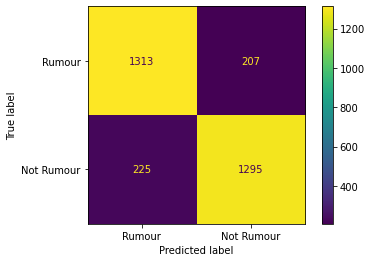

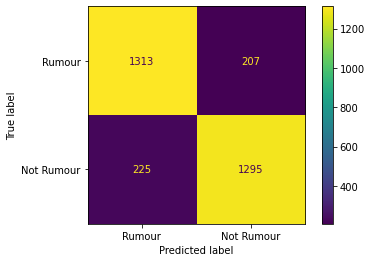

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,display_labels=classes)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test2,final))

              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86      1520
         1.0       0.86      0.85      0.86      1520

    accuracy                           0.86      3040
   macro avg       0.86      0.86      0.86      3040
weighted avg       0.86      0.86      0.86      3040

              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86      1520
         1.0       0.86      0.85      0.86      1520

    accuracy                           0.86      3040
   macro avg       0.86      0.86      0.86      3040
weighted avg       0.86      0.86      0.86      3040



Gradient Boosting


> Gradient boosting is one of the most common ways to use machine learning for tabular datasets. It is able to deal with missing values, outliers, and large cardinality categorical values on the features without any additional processing being required. In addition to this, its capability allows it to discover any nonlinear relationship that may exist between the sample target and the features.



In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)

In [ ]:
final = clf.predict(X_test2)

In [ ]:
cf_matrix=confusion_matrix(y_test2,final)

In [ ]:
classes =["Not Rumour"," Rumour"]

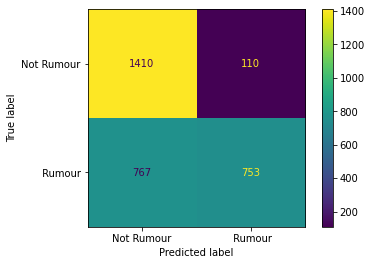

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,display_labels=classes)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test2,final))

              precision    recall  f1-score   support

         0.0       0.65      0.93      0.76      1520
         1.0       0.87      0.50      0.63      1520

    accuracy                           0.71      3040
   macro avg       0.76      0.71      0.70      3040
weighted avg       0.76      0.71      0.70      3040



XGB Boost


> XGBoost is a strategy for machine learning that makes use of a gradient boosting framework and is centered on the concept of decision trees.  Artificial neural networks tend to do better at making predictions with unstructured data than all other algorithms and frameworks.



In [ ]:
import xgboost 
from xgboost import XGBClassifier

In [ ]:
clf = XGBClassifier().fit(X_train, y_train)

In [ ]:
final = clf.predict(X_test2)

In [ ]:
cf_matrix=confusion_matrix(y_test2,final)

In [ ]:
classes =["Not Rumour"," Rumour"]

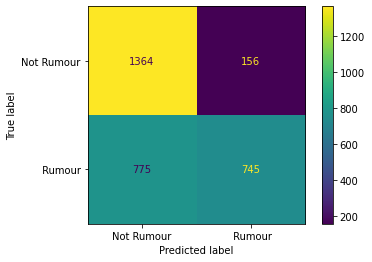

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,display_labels=classes)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test2,final))

              precision    recall  f1-score   support

         0.0       0.64      0.90      0.75      1520
         1.0       0.83      0.49      0.62      1520

    accuracy                           0.69      3040
   macro avg       0.73      0.69      0.68      3040
weighted avg       0.73      0.69      0.68      3040

